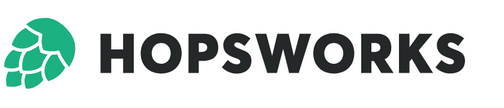

# Batch Predictions

**Note**: you may get an error when installing hopsworks on Colab, and it is safe to ignore it.

## 🗒️ This notebook is divided in 3 main sections:
1. **Read a batch of data, ready for batch inference**
2. **Download & use the model to generate predictions using the inference data**
3. **Save the UI output as a .png graph, and write the predictions to a Feature Group**

In [1]:
!pip install -U hopsworks --quiet

You should consider upgrading via the '/Users/xianyao/myenv/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()
mr = project.get_model_registry()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/72856
Connected. Call `.close()` to terminate connection gracefully.
Connected. Call `.close()` to terminate connection gracefully.


In [3]:
import datetime
start_date = (datetime.datetime.now() - datetime.timedelta(hours=24)) 
end_date = (datetime.datetime.now()) 
print(start_date)
print(end_date)

2023-07-12 04:27:06.699729
2023-07-13 04:27:06.699831


In [4]:
feature_view = fs.get_feature_view("cc_trans_fraud", 1)

feature_view.init_batch_scoring(training_dataset_version=1)

In [5]:
print(feature_view.get_batch_query())

WITH right_fg0 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg0`.`cc_num` `cc_num`, `fg0`.`category` `category`, `fg0`.`amount` `amount`, `fg0`.`age_at_transaction` `age_at_transaction`, `fg0`.`days_until_card_expires` `days_until_card_expires`, `fg0`.`loc_delta_t_minus_1` `loc_delta_t_minus_1`, `fg0`.`time_delta_t_minus_1` `time_delta_t_minus_1`, RANK() OVER (PARTITION BY `fg2`.`cc_num`, `fg2`.`datetime` ORDER BY `fg0`.`datetime` DESC) pit_rank_hopsworks
FROM `iris_flower_featurestore`.`transactions_fraud_label_2` `fg2`
INNER JOIN `iris_flower_featurestore`.`cc_trans_fraud_2` `fg0` ON `fg2`.`cc_num` = `fg0`.`cc_num` AND `fg2`.`datetime` >= `fg0`.`datetime`) NA
WHERE `pit_rank_hopsworks` = 1), right_fg1 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg1`.`trans_volume_mstd` `trans_volume_m

In [6]:
transactions_df = feature_view.get_batch_data(start_time = start_date, end_time = end_date)
transactions_df

2023-07-13 04:27:36,571 INFO: USE `iris_flower_featurestore`
2023-07-13 04:27:37,439 INFO: WITH right_fg0 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg0`.`cc_num` `cc_num`, `fg0`.`category` `category`, `fg0`.`amount` `amount`, `fg0`.`age_at_transaction` `age_at_transaction`, `fg0`.`days_until_card_expires` `days_until_card_expires`, `fg0`.`loc_delta_t_minus_1` `loc_delta_t_minus_1`, `fg0`.`time_delta_t_minus_1` `time_delta_t_minus_1`, RANK() OVER (PARTITION BY `fg2`.`cc_num`, `fg2`.`datetime` ORDER BY `fg0`.`datetime` DESC) pit_rank_hopsworks
FROM `iris_flower_featurestore`.`transactions_fraud_label_2` `fg2`
INNER JOIN `iris_flower_featurestore`.`cc_trans_fraud_2` `fg0` ON `fg2`.`cc_num` = `fg0`.`cc_num` AND `fg2`.`datetime` >= `fg0`.`datetime`
WHERE `fg2`.`datetime` >= 1689136026699 AND `fg2`.`datetime` < 1689222426699) NA
WHERE `pit_rank_hopsworks` = 1), right_fg1 AS (SELECT *
FROM 

,tid,datetime,cc_num,category,amount,age_at_transaction,days_until_card_expires,loc_delta_t_minus_1,time_delta_t_minus_1,trans_volume_mstd,trans_volume_mavg,trans_freq,loc_delta_mavg
0,731302dbc1efdba3cde3b3f17fa95cf5,1689149279000,4003456744416606,1,0.001158,0.722324,0.714760,0.083660,0.000763,0.004608,0.004417,0.004417,0.066776
1,7d8d797704be6d5fc8f5b0f9f9b3eda9,1689159353000,4003456744416606,5,0.002673,0.722328,0.714703,0.069562,0.000623,0.007485,0.007295,0.007295,0.091051
2,6ad556b284bbf4bd75756672a38303dd,1689169986000,4003456744416606,2,0.002593,0.722332,0.714644,0.084442,0.001335,0.008593,0.008403,0.008403,0.171392
3,e0a19ac6937a13b1ddd27a9273ce265f,1689191987000,4003456744416606,2,0.000735,0.722341,0.714520,0.061841,0.001058,0.001623,0.001432,0.001432,0.206213
4,c14bf777a8814c8d2b6dd9dbb4bdc008,1689198795000,4003456744416606,5,0.002701,0.722343,0.714481,0.081778,0.000453,0.008001,0.007811,0.007811,0.138768
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52945,2225bd6671f1d36589cabab2f56fdd3f,1689169334000,4996553417303563,1,0.001644,0.804668,0.596516,0.034486,0.001142,0.006690,0.006500,0.006500,0.182005
52946,acff8de4c628c1e73865eddd8b2a84cc,1689196154000,4996553417303563,1,0.002339,0.804678,0.596365,0.053600,0.000035,0.003751,0.003560,0.003560,0.136144
52947,fe907c04f7fd8d5ed72ff5a59d7d8b2d,1689206093000,4996851040334371,2,0.002708,0.464594,0.833057,0.012574,0.001214,0.005477,0.005287,0.005287,0.114250
52948,c2d37d23d686a8ed7e1d2282da1b3377,1689203384000,4999763787658689,2,0.000991,0.592546,0.241446,0.080326,0.000821,0.007722,0.007532,0.007532,0.181527


In [7]:
features_df = transactions_df.iloc[: , 3:]
features_df

,category,amount,age_at_transaction,days_until_card_expires,loc_delta_t_minus_1,time_delta_t_minus_1,trans_volume_mstd,trans_volume_mavg,trans_freq,loc_delta_mavg
0,1,0.001158,0.722324,0.714760,0.083660,0.000763,0.004608,0.004417,0.004417,0.066776
1,5,0.002673,0.722328,0.714703,0.069562,0.000623,0.007485,0.007295,0.007295,0.091051
2,2,0.002593,0.722332,0.714644,0.084442,0.001335,0.008593,0.008403,0.008403,0.171392
3,2,0.000735,0.722341,0.714520,0.061841,0.001058,0.001623,0.001432,0.001432,0.206213
4,5,0.002701,0.722343,0.714481,0.081778,0.000453,0.008001,0.007811,0.007811,0.138768
...,...,...,...,...,...,...,...,...,...,...
52945,1,0.001644,0.804668,0.596516,0.034486,0.001142,0.006690,0.006500,0.006500,0.182005
52946,1,0.002339,0.804678,0.596365,0.053600,0.000035,0.003751,0.003560,0.003560,0.136144
52947,2,0.002708,0.464594,0.833057,0.012574,0.001214,0.005477,0.005287,0.005287,0.114250
52948,2,0.000991,0.592546,0.241446,0.080326,0.000821,0.007722,0.007532,0.007532,0.181527


In [8]:
import joblib

the_model = mr.get_model("cc_fraud", version=1)
model_dir = the_model.download()

model = joblib.load(model_dir + "/cc_fraud_model.pkl")

## <span style="color:#ff5f27;">  Use the model to score transactions </span>

In [9]:
predictions = model.predict(features_df)

See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


In [10]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
transactions_df['prediction'] = predictions.tolist()

In [12]:
results_df = transactions_df.copy()[["tid", "cc_num", "datetime", "prediction"]]

In [13]:
results_df.loc[:,'batch_start_date'] = start_date
results_df

,tid,cc_num,datetime,prediction,batch_start_date
0,731302dbc1efdba3cde3b3f17fa95cf5,4003456744416606,1689149279000,0,2023-07-12 04:27:06.699729
1,7d8d797704be6d5fc8f5b0f9f9b3eda9,4003456744416606,1689159353000,0,2023-07-12 04:27:06.699729
2,6ad556b284bbf4bd75756672a38303dd,4003456744416606,1689169986000,0,2023-07-12 04:27:06.699729
3,e0a19ac6937a13b1ddd27a9273ce265f,4003456744416606,1689191987000,0,2023-07-12 04:27:06.699729
4,c14bf777a8814c8d2b6dd9dbb4bdc008,4003456744416606,1689198795000,0,2023-07-12 04:27:06.699729
...,...,...,...,...,...
52945,2225bd6671f1d36589cabab2f56fdd3f,4996553417303563,1689169334000,0,2023-07-12 04:27:06.699729
52946,acff8de4c628c1e73865eddd8b2a84cc,4996553417303563,1689196154000,0,2023-07-12 04:27:06.699729
52947,fe907c04f7fd8d5ed72ff5a59d7d8b2d,4996851040334371,1689206093000,0,2023-07-12 04:27:06.699729
52948,c2d37d23d686a8ed7e1d2282da1b3377,4999763787658689,1689203384000,0,2023-07-12 04:27:06.699729


In [14]:
results_fg = fs.get_or_create_feature_group(
    name="cc_fraud_results",
    version=1,
    description="Number of predicted frauds by card",
    primary_key=["cc_num"],
    event_time="datetime"
)
results_fg.insert(results_df)

Uploading Dataframe: 0.00% |          | Rows 0/52950 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: cc_fraud_results_1_offline_fg_backfill
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/72856/jobs/named/cc_fraud_results_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7f7bb000b190>, None)

In [15]:
results_df.loc[:,'batch_end_date'] = end_date
results_df

,tid,cc_num,datetime,prediction,batch_start_date,batch_end_date
0,731302dbc1efdba3cde3b3f17fa95cf5,4003456744416606,1689149279000,0,2023-07-12 04:27:06.699729,2023-07-13 04:27:06.699831
1,7d8d797704be6d5fc8f5b0f9f9b3eda9,4003456744416606,1689159353000,0,2023-07-12 04:27:06.699729,2023-07-13 04:27:06.699831
2,6ad556b284bbf4bd75756672a38303dd,4003456744416606,1689169986000,0,2023-07-12 04:27:06.699729,2023-07-13 04:27:06.699831
3,e0a19ac6937a13b1ddd27a9273ce265f,4003456744416606,1689191987000,0,2023-07-12 04:27:06.699729,2023-07-13 04:27:06.699831
4,c14bf777a8814c8d2b6dd9dbb4bdc008,4003456744416606,1689198795000,0,2023-07-12 04:27:06.699729,2023-07-13 04:27:06.699831
...,...,...,...,...,...,...
52945,2225bd6671f1d36589cabab2f56fdd3f,4996553417303563,1689169334000,0,2023-07-12 04:27:06.699729,2023-07-13 04:27:06.699831
52946,acff8de4c628c1e73865eddd8b2a84cc,4996553417303563,1689196154000,0,2023-07-12 04:27:06.699729,2023-07-13 04:27:06.699831
52947,fe907c04f7fd8d5ed72ff5a59d7d8b2d,4996851040334371,1689206093000,0,2023-07-12 04:27:06.699729,2023-07-13 04:27:06.699831
52948,c2d37d23d686a8ed7e1d2282da1b3377,4999763787658689,1689203384000,0,2023-07-12 04:27:06.699729,2023-07-13 04:27:06.699831


In [16]:
import numpy as np
unique, counts = np.unique(predictions, return_counts=True)

In [17]:
print(np.asarray((unique, counts)).T)

[[    0 52897]
 [    1    53]]


In [18]:
print(counts[1])

53


In [19]:
import pandas as pd
data = {'datetime': [start_date], 'num_predicted_fraud': [counts[1]]}
df = pd.DataFrame.from_dict(data)

### Write the number of predicted credit card frauds to a Feature Group


In [20]:
fraud_fg = fs.get_or_create_feature_group(
    name="predicted_fraud",
    version=1,
    description="Number of predicted frauds by day",
    primary_key=["datetime"],
    event_time="datetime"
)
fraud_fg.insert(df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/72856/fs/72775/fg/77356


Uploading Dataframe: 0.00% |          | Rows 0/1 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: predicted_fraud_1_offline_fg_backfill
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/72856/jobs/named/predicted_fraud_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7f7bb07690d0>, None)

### Create a graph of the numer of suspected fraudulent transactions over time

First, read up all the historical suspected fraudulent transactions 

In [21]:
history_df = fraud_fg.read()

2023-07-13 04:36:38,027 INFO: USE `iris_flower_featurestore`
2023-07-13 04:36:38,781 INFO: SELECT `fg0`.`datetime` `datetime`, `fg0`.`num_predicted_fraud` `num_predicted_fraud`
FROM `iris_flower_featurestore`.`predicted_fraud_1` `fg0`


In [22]:
# Sort the historical fraud predictions by day
history_df = history_df.sort_values(by = ['datetime'])  

In [23]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             1 non-null      datetime64[ns]
 1   num_predicted_fraud  1 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 24.0 bytes


In [24]:
history_df['day_of_year'] = history_df['datetime'].dt.dayofyear 

history_df

,datetime,num_predicted_fraud,day_of_year
0,2023-07-12 04:27:06.699,53,193


<Figure size 1500x700 with 0 Axes>

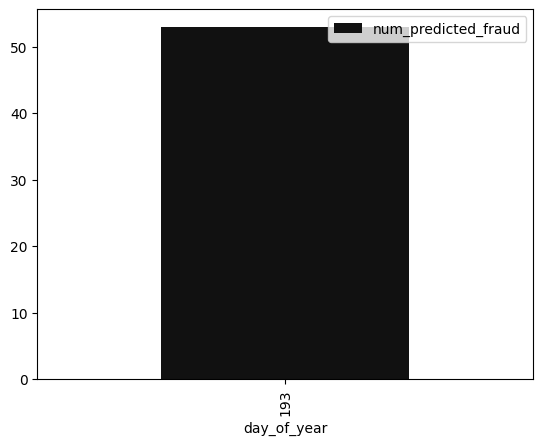

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

color='#111111'
plt.figure(figsize=(15, 7))

history_df.plot(kind='bar', x='day_of_year', y='num_predicted_fraud', color=color)

plt.savefig("fraud_counts.png")
plt.show()

plt.close()
